# Outlier Identification 

### Importing libraries and datasets

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cleaning_functions as cf 
import matplotlib.pyplot as plt # To box plot variables 


In [12]:
# Relative path to the CSV file
red_file_path = '../data/raw/winequality_red_raw.csv'  # Go up one level with '..', then into 'data/raw/'
white_file_path = '../data/raw/winequality_white_raw.csv' 
red_df = pd.read_csv(red_file_path)
white_df = pd.read_csv(white_file_path)

### Overview

In [13]:
cf.data_frame_overview(red_df)

Column names: 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Dimensions: (1599, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [14]:
cf.data_frame_overview(white_df)

Column names: 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Dimensions: (4898, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Duplicates

In [15]:
#red
cf.dup_check(red_df)

cf.drop_dup_reset(red_df)

Duplicates found: True

Number of duplicates: 240

Deleted 240 duplicates


In [16]:
#white
cf.dup_check(white_df)

cf.drop_dup_reset(white_df)

Duplicates found: True

Number of duplicates: 937

Deleted 937 duplicates


### Nulls

In [17]:
#red
cf.null_check(red_df)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
1354    0
1355    0
1356    0
1357    0
1358    0
Length: 1359, dtype: int64

Total null values per column: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



In [18]:
#white
cf.null_check(white_df)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
3956    0
3957    0
3958    0
3959    0
3960    0
Length: 3961, dtype: int64

Total null values per column: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



### Formatting 

In [19]:
red_df.columns = red_df.columns.str.replace(' ', '_') # Rename red columns 

In [20]:
white_df.columns = white_df.columns.str.replace(' ', '_') # Rename columns

### Descriptions 

In [13]:
red_df['fixed_acidity'].describe()

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

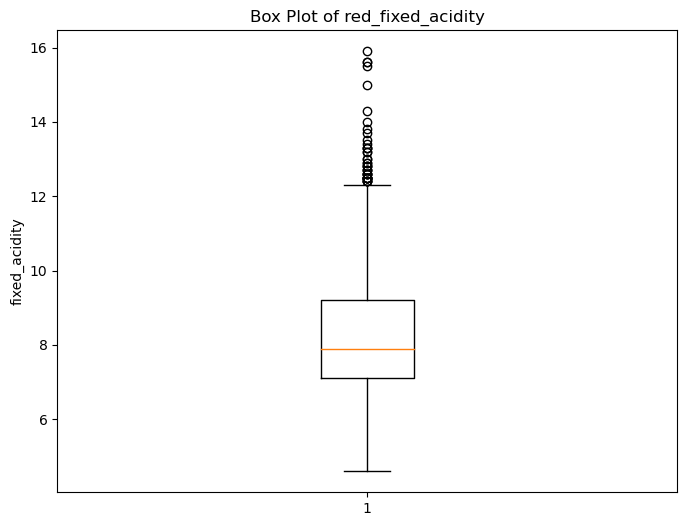

In [23]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['fixed_acidity'])

# Add labels and title
plt.ylabel('fixed_acidity')
plt.title('Box Plot of red_fixed_acidity')

# Show the plot
plt.show()

In [14]:
white_df['fixed_acidity'].describe()

count    3961.000000
mean        6.839346
std         0.866860
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed_acidity, dtype: float64

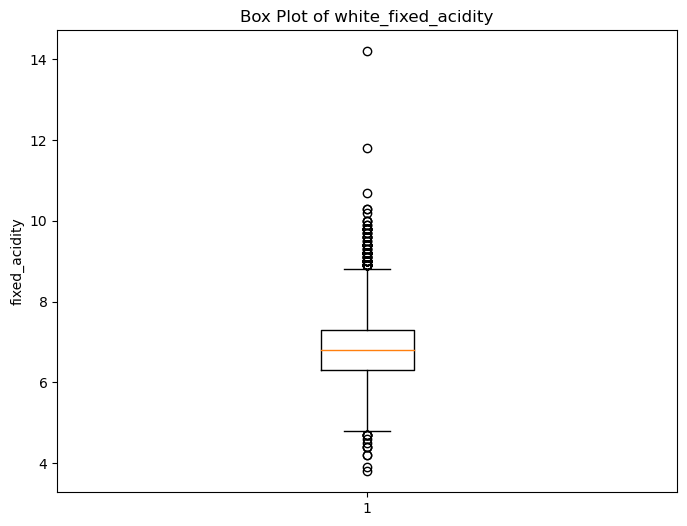

In [24]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['fixed_acidity'])

# Add labels and title
plt.ylabel('fixed_acidity')
plt.title('Box Plot of white_fixed_acidity')

# Show the plot
plt.show()

In [15]:
red_df['volatile_acidity'].describe()

count    1359.000000
mean        0.529478
std         0.183031
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile_acidity, dtype: float64

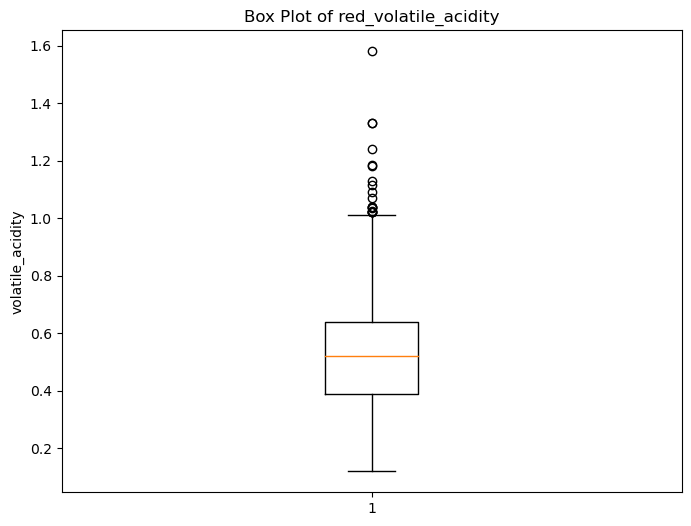

In [25]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['volatile_acidity'])

# Add labels and title
plt.ylabel('volatile_acidity')
plt.title('Box Plot of red_volatile_acidity')

# Show the plot
plt.show()

In [16]:
white_df['volatile_acidity'].describe()

count    3961.000000
mean        0.280538
std         0.103437
min         0.080000
25%         0.210000
50%         0.260000
75%         0.330000
max         1.100000
Name: volatile_acidity, dtype: float64

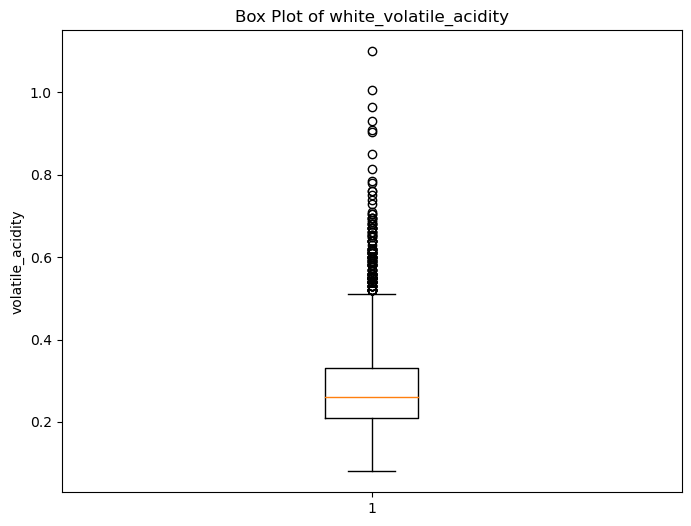

In [26]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['volatile_acidity'])

# Add labels and title
plt.ylabel('volatile_acidity')
plt.title('Box Plot of white_volatile_acidity')

# Show the plot
plt.show()

In [17]:
red_df['citric_acid'].describe()

count    1359.000000
mean        0.272333
std         0.195537
min         0.000000
25%         0.090000
50%         0.260000
75%         0.430000
max         1.000000
Name: citric_acid, dtype: float64

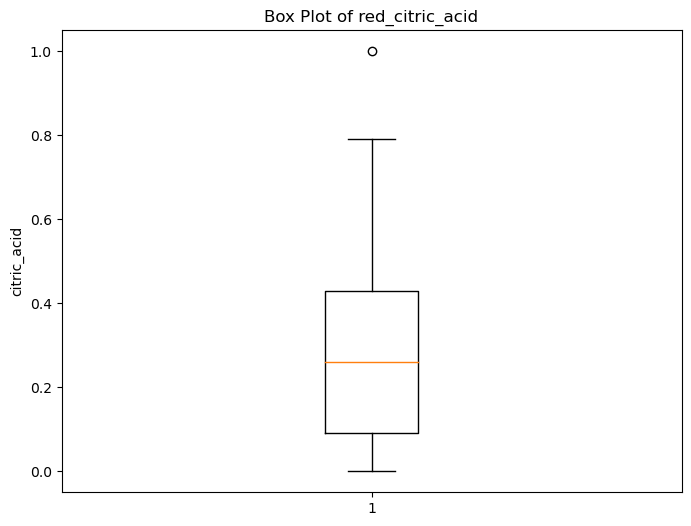

In [33]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['citric_acid'])

# Add labels and title
plt.ylabel('citric_acid')
plt.title('Box Plot of red_citric_acid')

# Show the plot
plt.show()

In [18]:
white_df['citric_acid'].describe()

count    3961.000000
mean        0.334332
std         0.122446
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric_acid, dtype: float64

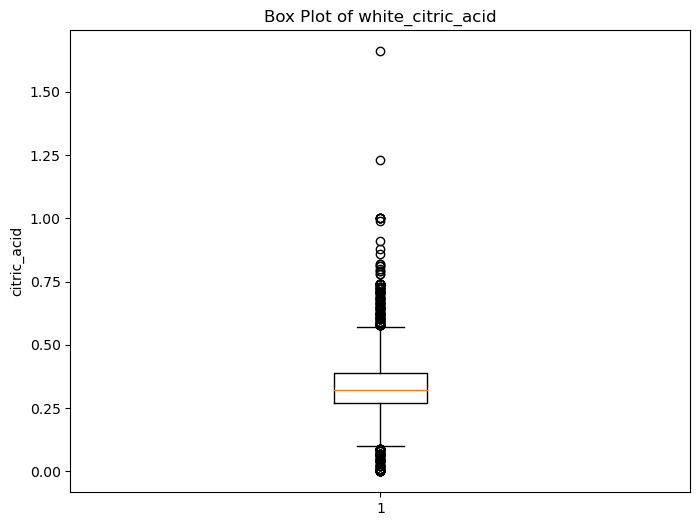

In [32]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['citric_acid'])

# Add labels and title
plt.ylabel('citric_acid')
plt.title('Box Plot of white_citric_acid')

# Show the plot
plt.show()

In [19]:
red_df['residual_sugar'].describe()

count    1359.000000
mean        2.523400
std         1.352314
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual_sugar, dtype: float64

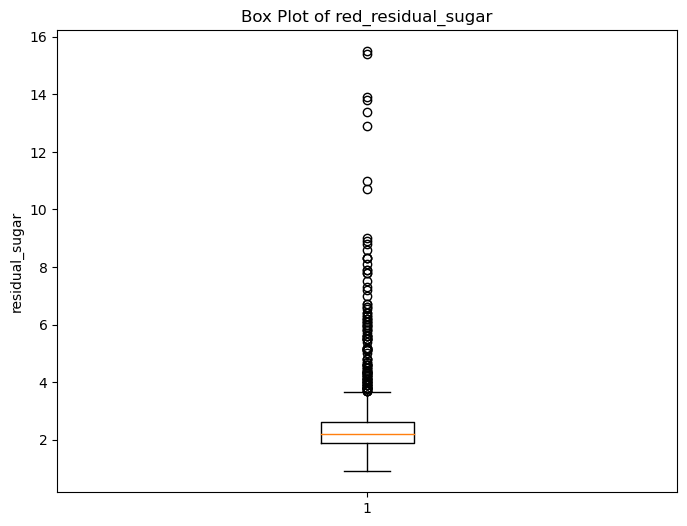

In [31]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['residual_sugar'])

# Add labels and title
plt.ylabel('residual_sugar')
plt.title('Box Plot of red_residual_sugar')

# Show the plot
plt.show()

In [20]:
white_df['residual_sugar'].describe()

count    3961.000000
mean        5.914819
std         4.861646
min         0.600000
25%         1.600000
50%         4.700000
75%         8.900000
max        65.800000
Name: residual_sugar, dtype: float64

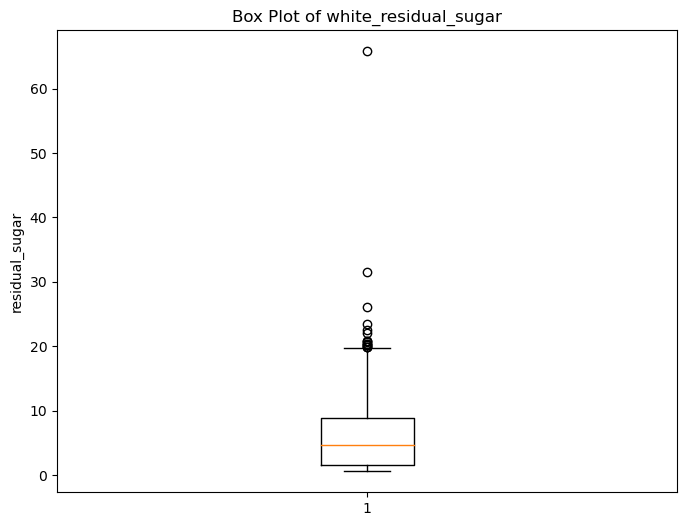

In [34]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['residual_sugar'])

# Add labels and title
plt.ylabel('residual_sugar')
plt.title('Box Plot of white_residual_sugar')

# Show the plot
plt.show()

In [21]:
red_df['chlorides'].describe()

count    1359.000000
mean        0.088124
std         0.049377
min         0.012000
25%         0.070000
50%         0.079000
75%         0.091000
max         0.611000
Name: chlorides, dtype: float64

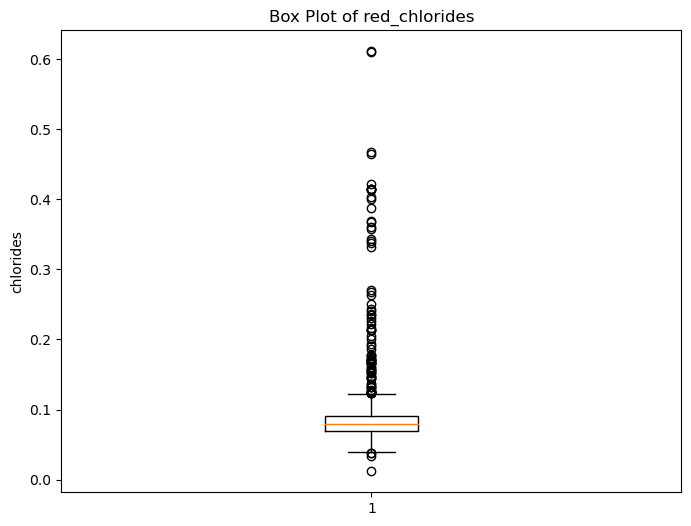

In [36]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['chlorides'])

# Add labels and title
plt.ylabel('chlorides')
plt.title('Box Plot of red_chlorides')

# Show the plot
plt.show()

In [22]:
white_df['chlorides'].describe()

count    3961.000000
mean        0.045905
std         0.023103
min         0.009000
25%         0.035000
50%         0.042000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

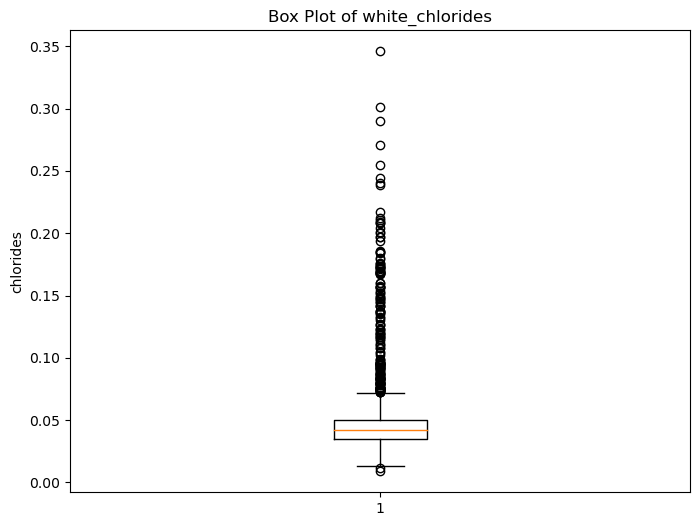

In [37]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['chlorides'])

# Add labels and title
plt.ylabel('chlorides')
plt.title('Box Plot of white_chlorides')

# Show the plot
plt.show()

In [23]:
red_df['free_sulfur_dioxide'].describe()

count    1359.000000
mean       15.893304
std        10.447270
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free_sulfur_dioxide, dtype: float64

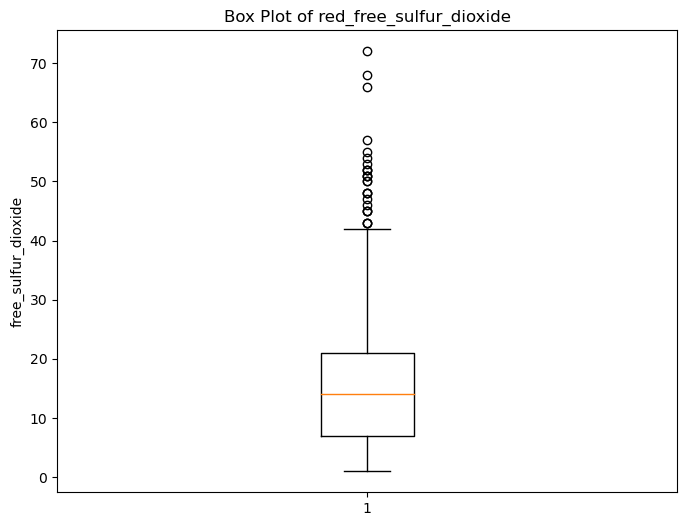

In [38]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['free_sulfur_dioxide'])

# Add labels and title
plt.ylabel('free_sulfur_dioxide')
plt.title('Box Plot of red_free_sulfur_dioxide')

# Show the plot
plt.show()

In [24]:
white_df['free_sulfur_dioxide'].describe()

count    3961.000000
mean       34.889169
std        17.210021
min         2.000000
25%        23.000000
50%        33.000000
75%        45.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64

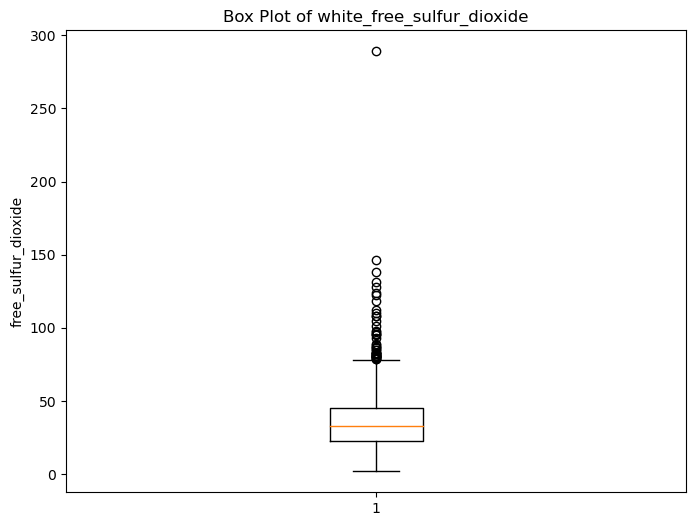

In [39]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['free_sulfur_dioxide'])

# Add labels and title
plt.ylabel('free_sulfur_dioxide')
plt.title('Box Plot of white_free_sulfur_dioxide')

# Show the plot
plt.show()

In [25]:
red_df['total_sulfur_dioxide'].describe()

count    1359.000000
mean       46.825975
std        33.408946
min         6.000000
25%        22.000000
50%        38.000000
75%        63.000000
max       289.000000
Name: total_sulfur_dioxide, dtype: float64

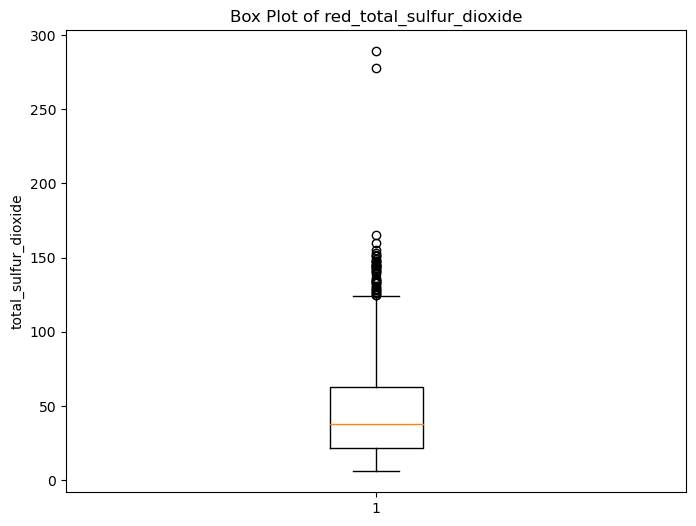

In [40]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['total_sulfur_dioxide'])

# Add labels and title
plt.ylabel('total_sulfur_dioxide')
plt.title('Box Plot of red_total_sulfur_dioxide')

# Show the plot
plt.show()

In [26]:
white_df['total_sulfur_dioxide'].describe()

count    3961.000000
mean      137.193512
std        43.129065
min         9.000000
25%       106.000000
50%       133.000000
75%       166.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64

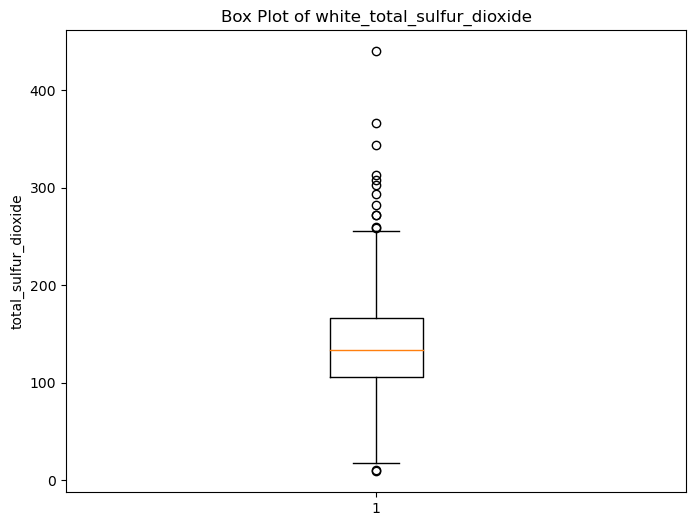

In [41]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['total_sulfur_dioxide'])

# Add labels and title
plt.ylabel('total_sulfur_dioxide')
plt.title('Box Plot of white_total_sulfur_dioxide')

# Show the plot
plt.show()

In [27]:
red_df['density'].describe()

count    1359.000000
mean        0.996709
std         0.001869
min         0.990070
25%         0.995600
50%         0.996700
75%         0.997820
max         1.003690
Name: density, dtype: float64

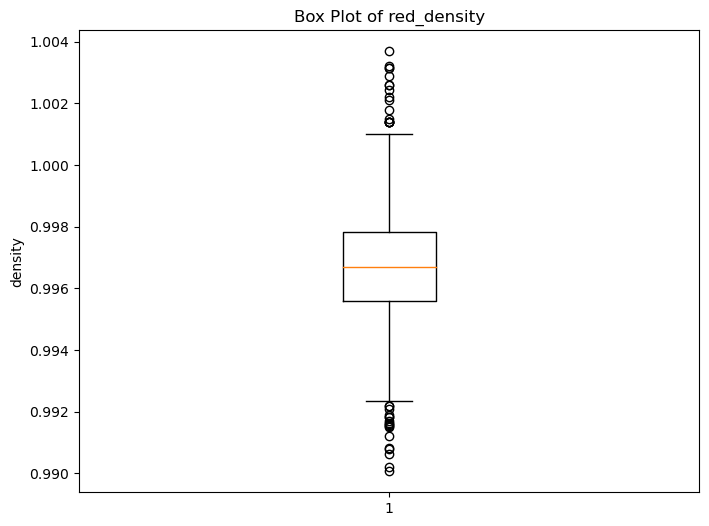

In [42]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['density'])

# Add labels and title
plt.ylabel('density')
plt.title('Box Plot of red_density')

# Show the plot
plt.show()

In [28]:
white_df['density'].describe()

count    3961.000000
mean        0.993790
std         0.002905
min         0.987110
25%         0.991620
50%         0.993500
75%         0.995710
max         1.038980
Name: density, dtype: float64

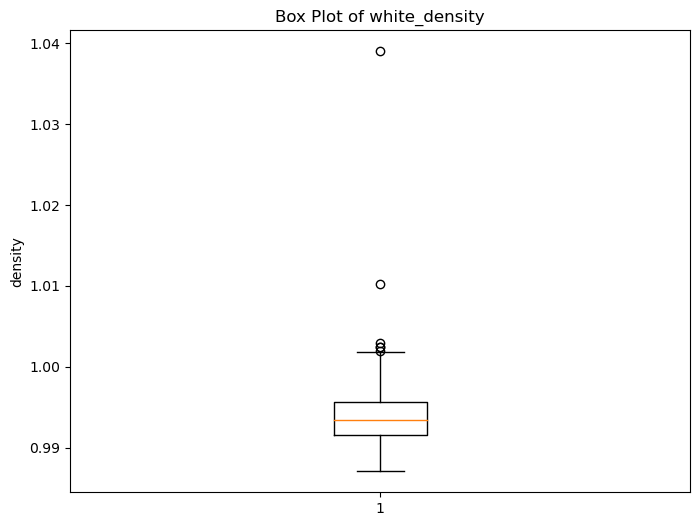

In [43]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['density'])

# Add labels and title
plt.ylabel('density')
plt.title('Box Plot of white_density')

# Show the plot
plt.show()

In [29]:
red_df['pH'].describe()

count    1359.000000
mean        3.309787
std         0.155036
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

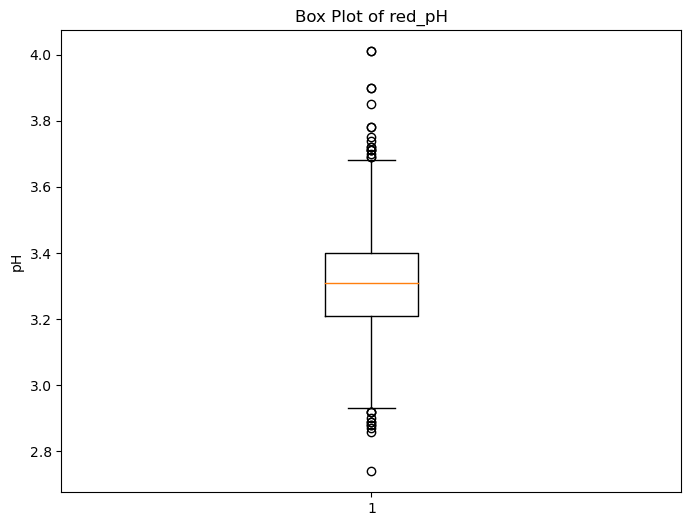

In [44]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['pH'])

# Add labels and title
plt.ylabel('pH')
plt.title('Box Plot of red_pH')

# Show the plot
plt.show()

In [30]:
white_df['pH'].describe()

count    3961.000000
mean        3.195458
std         0.151546
min         2.720000
25%         3.090000
50%         3.180000
75%         3.290000
max         3.820000
Name: pH, dtype: float64

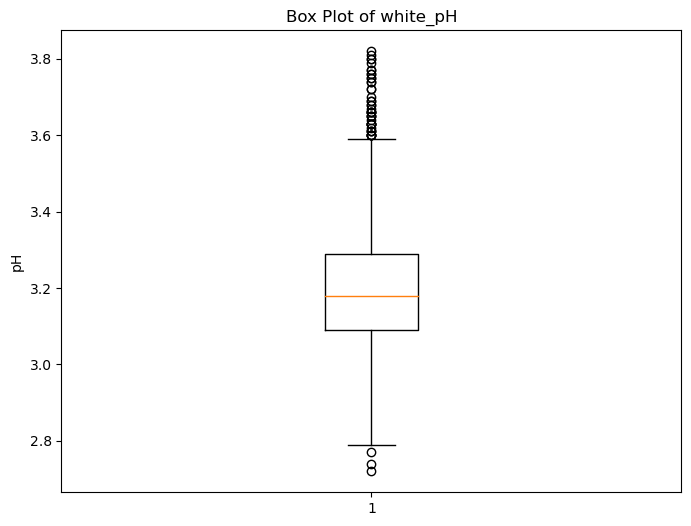

In [45]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['pH'])

# Add labels and title
plt.ylabel('pH')
plt.title('Box Plot of white_pH')

# Show the plot
plt.show()

In [31]:
red_df['sulphates'].describe()

count    1359.000000
mean        0.658705
std         0.170667
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

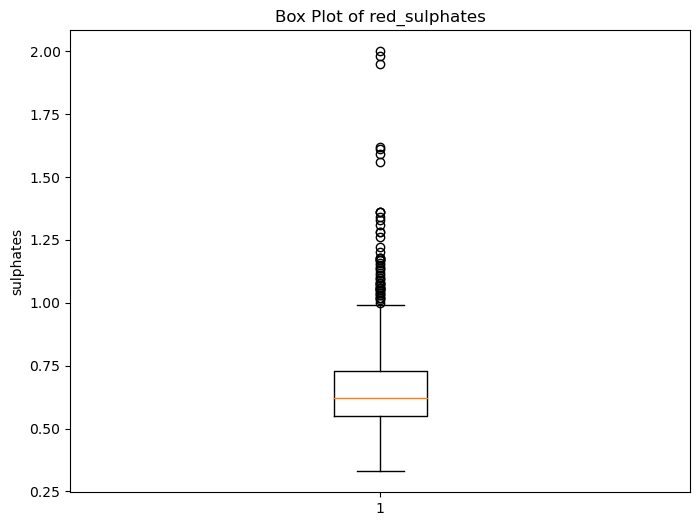

In [46]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['sulphates'])

# Add labels and title
plt.ylabel('sulphates')
plt.title('Box Plot of red_sulphates')

# Show the plot
plt.show()

In [32]:
white_df['sulphates'].describe()

count    3961.000000
mean        0.490351
std         0.113523
min         0.220000
25%         0.410000
50%         0.480000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64

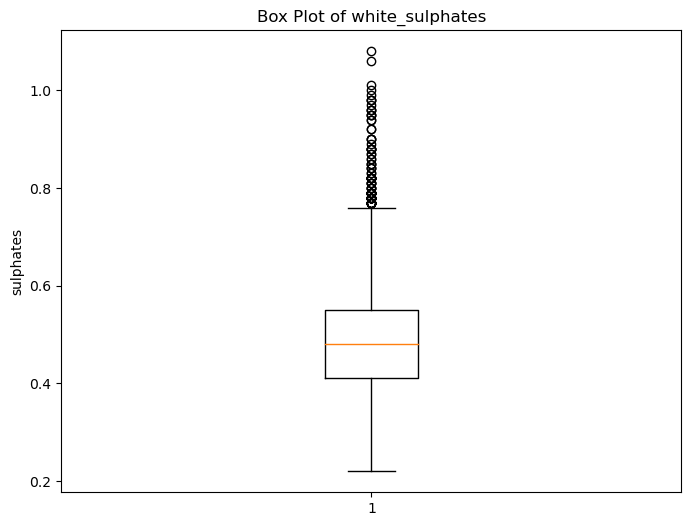

In [47]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['sulphates'])

# Add labels and title
plt.ylabel('sulphates')
plt.title('Box Plot of white_sulphates')

# Show the plot
plt.show()

In [33]:
red_df['alcohol'].describe()

count    1359.000000
mean       10.432315
std         1.082065
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

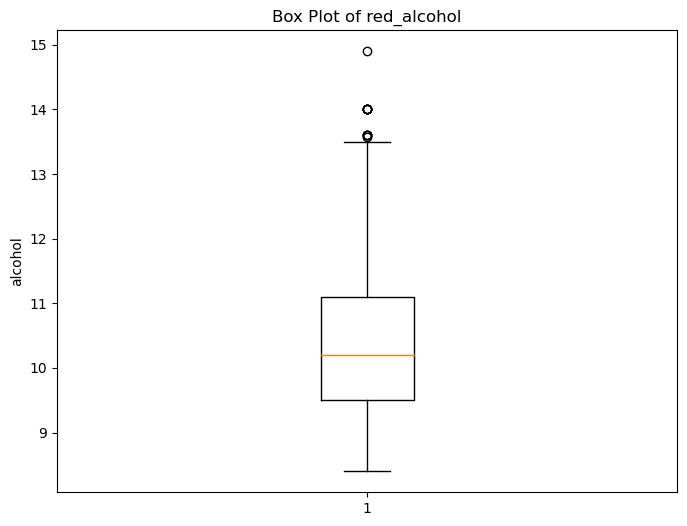

In [49]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(red_df['alcohol'])

# Add labels and title
plt.ylabel('alcohol')
plt.title('Box Plot of red_alcohol')

# Show the plot
plt.show()

In [34]:
white_df['alcohol'].describe()

count    3961.000000
mean       10.589358
std         1.217076
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

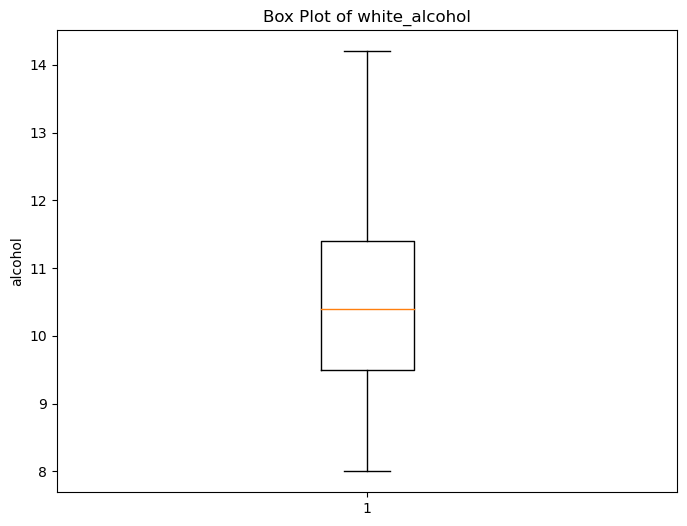

In [50]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(white_df['alcohol'])

# Add labels and title
plt.ylabel('alcohol')
plt.title('Box Plot of white_alcohol')

# Show the plot
plt.show()

In [35]:
red_df['quality'].describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [36]:
white_df['quality'].describe()

count    3961.000000
mean        5.854835
std         0.890683
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64